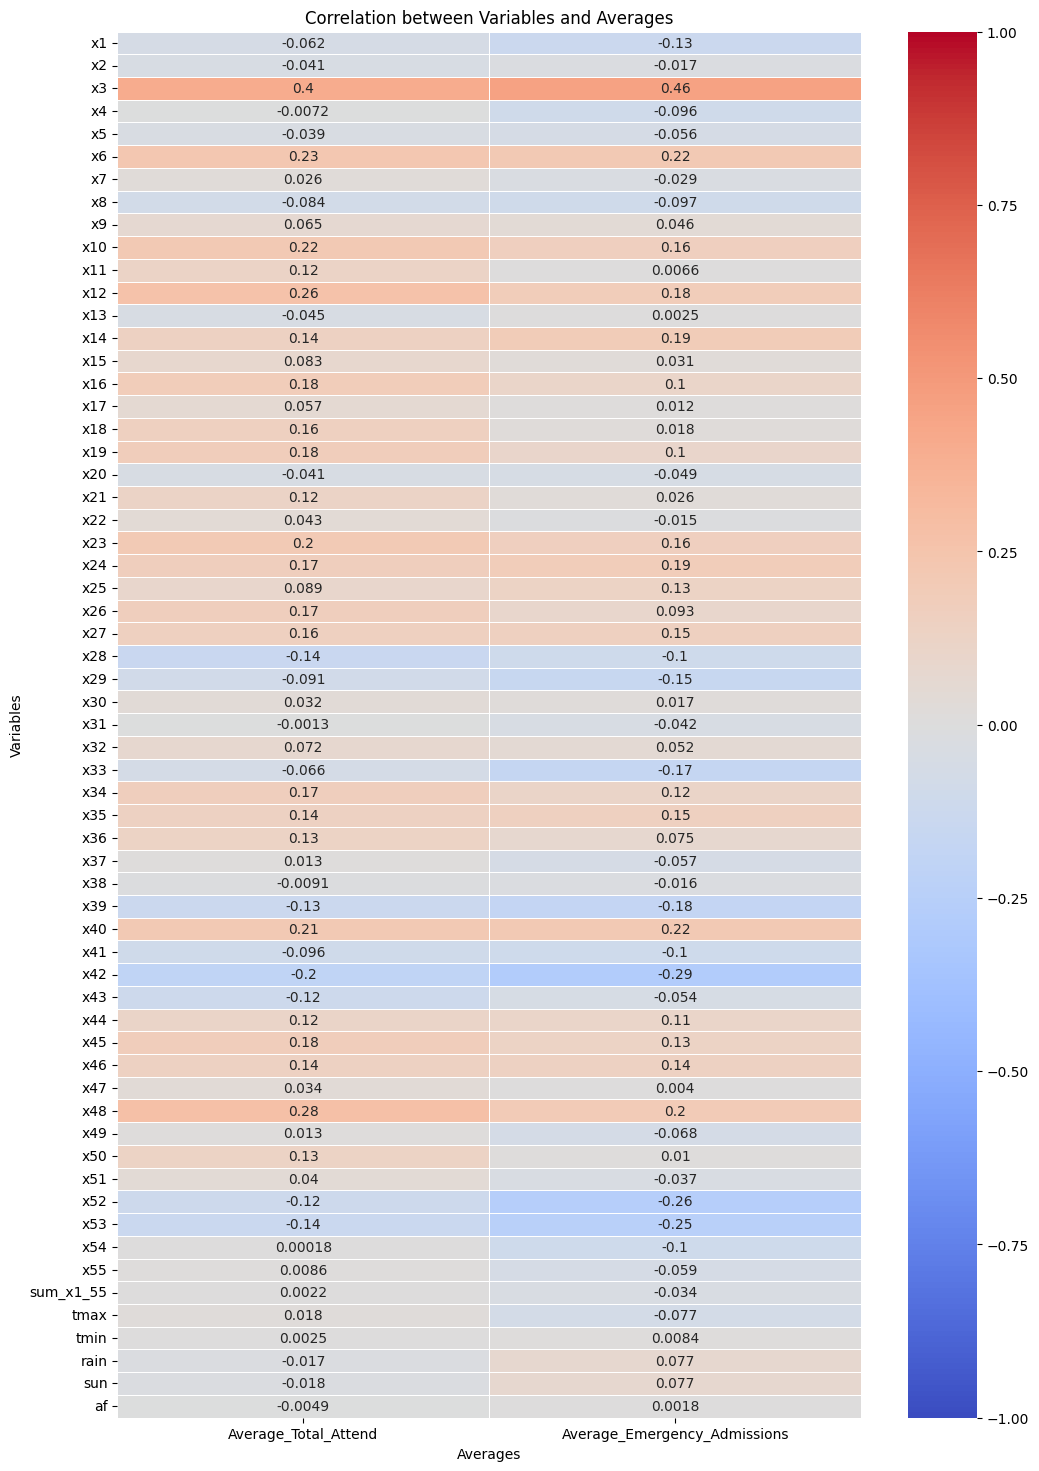

           Average_Total_Attend  Average_Emergency_Admissions
x1                    -0.062339                     -0.130043
x2                    -0.041467                     -0.017492
x3                     0.401546                      0.456133
x4                    -0.007221                     -0.095896
x5                    -0.038784                     -0.055833
x6                     0.234055                      0.217494
x7                     0.026174                     -0.028906
x8                    -0.083562                     -0.097267
x9                     0.064844                      0.045979
x10                    0.217892                      0.158814
x11                    0.117815                      0.006565
x12                    0.263839                      0.184211
x13                   -0.044542                      0.002512
x14                    0.142743                      0.190029
x15                    0.083090                      0.031135
x16     

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_original = pd.read_excel('/content/dataset_analysis.xlsx')
df = df_original.copy()
# Dropping the 'city' and 'weather_station' columns
df = df.drop(['city', 'weather_station'], axis=1)


variables = df.columns[:-7]  # x1 to x55
#print(variables)
weather_variables = df.columns[-5:]  # tmax, tmin, rain, sun, af
#print(weather_variables)
averages = df.columns[-7:-5]  # Average_Total_Attend and Average_Emergency_Admissions
#print(averages)

df['sum_x1_55'] = df[variables].sum(axis=1)

# Updating variables to include the new sum_x1_55 variable and weather variables
all_variables = list(variables) + ['sum_x1_55'] + list(weather_variables)

# Calculating correlations with each average separately
corr_total_attend = df[all_variables].corrwith(df[averages[0]]).to_frame(name=averages[0])
corr_emergency_admissions = df[all_variables].corrwith(df[averages[1]]).to_frame(name=averages[1])

# Concatenating the two correlation dataframes side by side
correlation_matrix = pd.concat([corr_total_attend, corr_emergency_admissions], axis=1)

plt.figure(figsize=(12, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation between Variables and Averages')
plt.xlabel('Averages')
plt.ylabel('Variables')
plt.show()

pd.set_option('display.max_rows', correlation_matrix.shape[0])
pd.set_option('display.max_columns', correlation_matrix.shape[1])
pd.set_option('display.width', 1000)

df.head()
print(correlation_matrix)

<Axes: xlabel='x3', ylabel='Average_Total_Attend'>

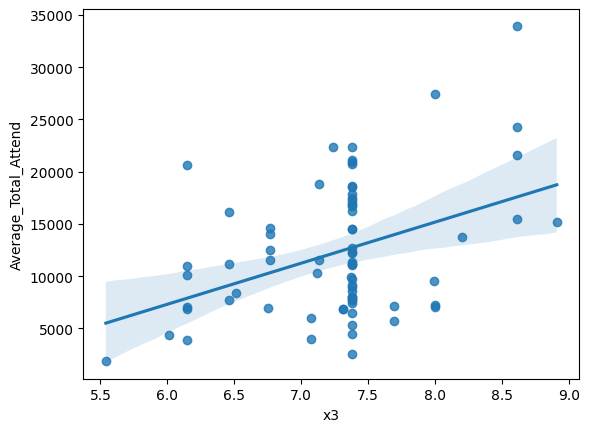

In [ ]:
sns.regplot(data=df, x='x3', y='Average_Total_Attend')

<Axes: xlabel='x42', ylabel='Average_Emergency_Admissions'>

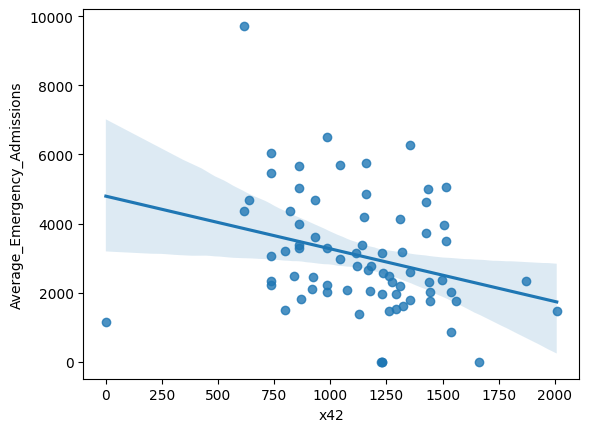

In [ ]:
sns.regplot(data=df, x='x42', y='Average_Emergency_Admissions')

<Axes: xlabel='x52', ylabel='Average_Emergency_Admissions'>

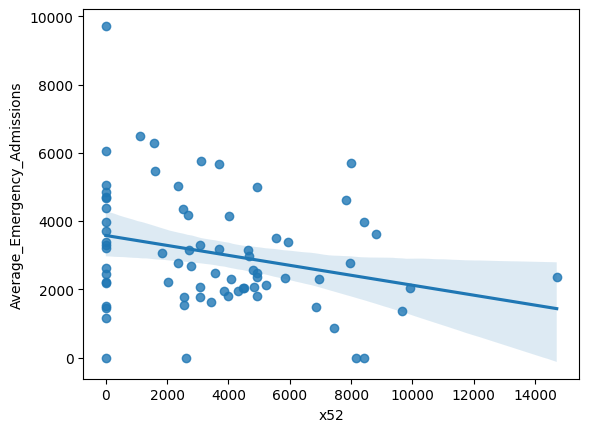

In [ ]:
sns.regplot(data=df, x='x52', y='Average_Emergency_Admissions')

<Axes: xlabel='x3', ylabel='Average_Emergency_Admissions'>

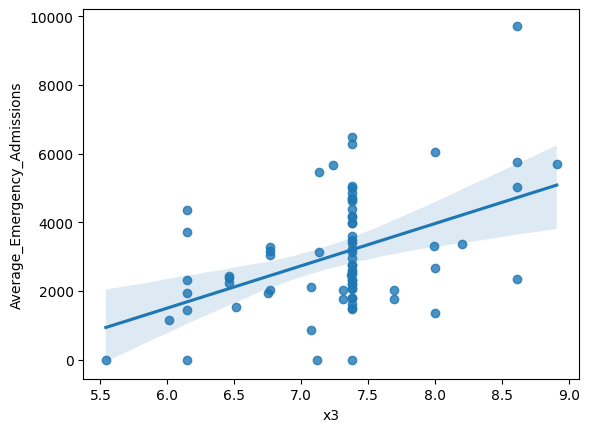

In [ ]:
sns.regplot(data=df, x='x3', y='Average_Emergency_Admissions')

In [ ]:
df.head()

,x1,...,sum_x1_55
0,18.45,...,121547.77
1,13.47,...,98942.51
2,14.76,...,82890.19
3,18.45,...,94180.50
4,18.45,...,90264.90


<Axes: xlabel='sum_x1_55', ylabel='Average_Total_Attend'>

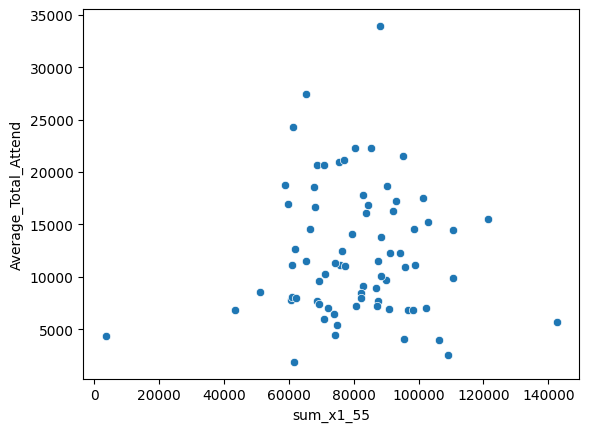

In [ ]:
sns.scatterplot(data=df, x='sum_x1_55', y='Average_Total_Attend')

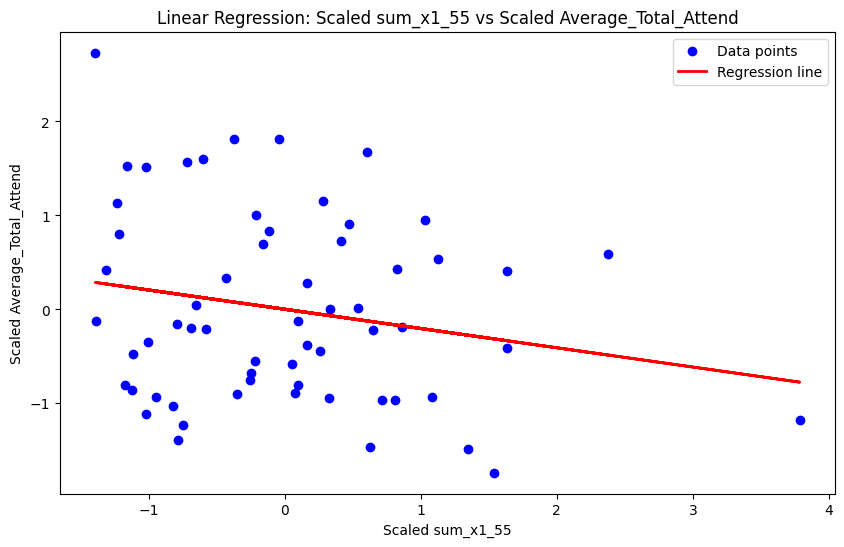

Intercept: -4.085735568442989e-16
Coefficient: -0.2051940725412558
Mean squared error: 0.9578953925939339
R^2 score: 0.04210460740606614


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Filtering out specific outliers
df_filtered = df[(df['sum_x1_55'] > 65000) & (df['Average_Total_Attend'] <= 30000)]

# Scaling the sum_x1_55 values
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(df_filtered[['sum_x1_55']])

# Scaling the Average_Total_Attend values
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(df_filtered[['Average_Total_Attend']])


model = LinearRegression()
model.fit(X_scaled, y_scaled.ravel())  # y_scaled needs to be 1D array for fit


y_pred_scaled = model.predict(X_scaled)

# Inverse transform predictions to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()


plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y_scaled, color='blue', label='Data points')
plt.plot(X_scaled, y_pred_scaled, color='red', linewidth=2, label='Regression line')


plt.title('Linear Regression: Scaled sum_x1_55 vs Scaled Average_Total_Attend')
plt.xlabel('Scaled sum_x1_55')
plt.ylabel('Scaled Average_Total_Attend')
plt.legend()
plt.show()


print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')
print(f'Mean squared error: {mean_squared_error(y_scaled, y_pred_scaled)}')
print(f'R^2 score: {r2_score(y_scaled, y_pred_scaled)}')


In [ ]:
plt.figure(figsize=(40, 26), dpi=300)
sns.barplot(data=df_original, x='city', y='Average_Total_Attend', hue='')
plt.xticks(rotation=90)
plt.show()